<class 'numpy.ndarray'>
areas:  [[6.7]
 [4.6]
 [3.5]
 [5.5]]
prices:  [[9.1]
 [5.9]
 [4.6]
 [6.7]]
data_size:  4


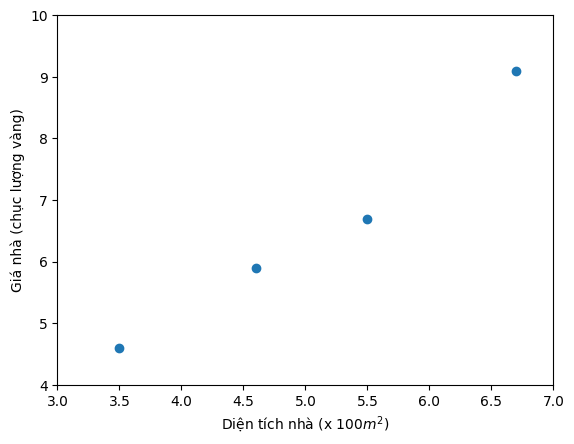

In [1]:
# Implementation - vectorization

# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0:1]
prices = data[:,1:]
N = areas.size

print(type(areas))
print('areas: ', areas)
print('prices: ', prices)
print('data_size: ', N)

plt.scatter(areas, prices)
plt.xlabel('Diện tích nhà (x 100$m^2$)')
plt.ylabel('Giá nhà (chục lượng vàng)')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

In [2]:
# forward
def predict(x, theta):
    return x.dot(theta)

# compute gradient
def gradient(y_hat, y, x):
    dtheta = 2*x*(y_hat-y)
    
    return dtheta

# update weights
def update_weight(theta, lr, dtheta):
    dtheta_new = theta - lr*dtheta
    
    return dtheta_new

In [3]:
theta = np.array([-0.34, 0.04]) # [w, b]
x = np.array([6.7, 1]) # [x, 1]
y = np.array([9.1])    # label
lr = 0.01

In [4]:
# predict y_hat
y_hat = predict(x, theta)
print(f'y_hat: {y_hat}')

# compute loss
loss = (y_hat-y)*(y_hat-y)
print(f'loss: {loss}')

# compute gradient
dtheta = gradient(y_hat, y, x)
print(f'dtheta: {dtheta}')

# update weights
theta = update_weight(theta, lr, dtheta)
print(f'theta: {theta}')

y_hat: -2.238
loss: [128.550244]
dtheta: [-151.9292  -22.676 ]
theta: [1.179292 0.26676 ]


### Implementation

In [5]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0:1]
prices = data[:,1]
N = areas.size

print(prices)

# vector [x, b]
data = np.hstack([areas, np.ones((N,1))])
print('data: \n', data)

theta = np.array([-0.34, 0.04]) #[w, b]
print('theta: \n', theta)

# params
lr = 0.01
epoch_max = 10

losses = [] # for debug

[9.1 5.9 4.6 6.7]
data: 
 [[6.7 1. ]
 [4.6 1. ]
 [3.5 1. ]
 [5.5 1. ]]
theta: 
 [-0.34  0.04]


In [6]:
# forward
def predict(x, theta):
    return x.dot(theta)

# compute gradient
def gradient(y_hat, y, x):
    dtheta = 2*x*(y_hat-y)
    
    return dtheta

# update weights
def update_weight(theta, lr, dtheta):
    dtheta_new = theta - lr*dtheta
    
    return dtheta_new

In [7]:
for epoch in range(epoch_max):    
    for i in range(N):        
        # get a sample
        x = data[i,:]
        y = prices[i:i+1]

        # predict y_hat
        y_hat = predict(x, theta)

        # compute loss
        loss = (y_hat-y)*(y_hat-y)
        losses.append(loss[0])

        # compute gradient
        dtheta = gradient(y_hat, y, x)

        # update weights
        theta = update_weight(theta, lr, dtheta)
        
print('theta: \n', theta)

theta: 
 [1.21260167 0.22516769]


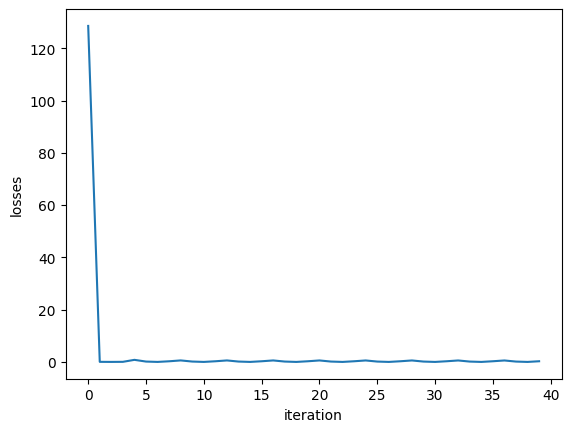

In [8]:
import matplotlib.pyplot as plt

plt.plot(losses) # test with losses[3:]
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

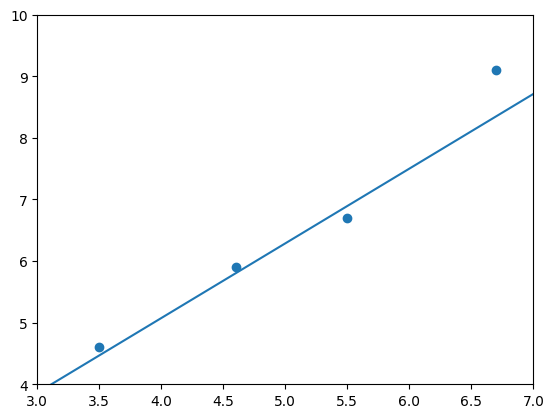

In [9]:
x_data = range(2, 8)
y_data = [x*theta[0] + theta[1] for x in x_data]
plt.plot(x_data, y_data)
#--------------------------------------
plt.scatter(areas, prices)
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()